<a href="https://colab.research.google.com/github/oarthurcarvalho/100DaysofCode/blob/main/Analisando_os_Dados_do_Airbnb_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Rio de Janeiro

<img alt="Airbnb Logo" height="350" src="https://github.com/oarthurcarvalho/100DaysofCode/blob/main/Round%201/airbnb_banner.jpg?raw=true">

O [Airbnb](www.airbnb.com.br) é uma plataforma de hospedagem, que oferece outras opções além de hóteis, albergues e hostels para viajantes do mundo inteiro, sendo uma alternativa mais barata em relação a acomodações mais tradicionais.

A plataforma foi fundada em 2008 por dois designers tinham espaço sobrando e decidiram hospedar três pessoas que estavam procurando um local para dormir e tomar café da manhã.

A plataforma cresceu e em 2021 já havia hospedado mais de 1 bilhão de pessoas ao redor do mundo, se tornando a maior empresa hoteleira do mundo sem possuir nenhum hotel. É evidente que a empresa se tornou um desafio as redes hoteleiras, sobrando a elas clientes que buscam o modelo mais tradicional do serviço.

A empresa, por iniciativa própria, disponibiliza dados das acomodações das principais cidades do mundo. Os dados estão em Inside Airbnb e podem ser baixados sem a necessidade de cadastro.

**O objetivo deste notebook é analisar os dados (EDA ou Exploratory Data Analysis) do Airbnb da cidade do Rio de Janeiro, afim de extrair características sobre as acomodações na cidade**



## 1. Obtendo os Dados

Como dito anteriormente, os dados estão no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para a análise, utilizaremos os dados do arquivo:

`listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

**De tempos em tempos estes dados são atualizados (Compilados em 24 de Dezembro 2021), o que pode gerar resultados diferentes.**

Iremos importar todas as bibliotecas usadas durante o notebook e importar os dados



In [1]:
!pip install pywaffle -q

     |████████████████████████████████| 565 kB 5.8 MB/s 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import ceil
from pywaffle import Waffle
from IPython.display import Markdown as md

%matplotlib inline

In [3]:
file_path = "http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-12-24/visualisations/listings.csv"
df = pd.read_csv(file_path)

## 2. Análise do Dataset

Para criarmos uma consciência dos dados que iremos analisar, precisamos saber como os dados estão estruturados e o significado de cada coluna.

O dicionário de dados, o documento que explica o que cada coluna significa foi disponibilizado pelo Airbnb [neste link](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896).

Abaixo, estão as variáveis encontradas em `listings.csv`

1. `id` - Número de id gerado para identificar o imóvel
2. `name` - Nome da propriedade
3. `host_id` - Número de id do proprietário (anfitrião) da propriedade
4. `host_name` - Nome do Anfitrião
5. `neighbourhood_group` - Não contém nenhum valor válido
6. `neighbourhood` - nome do bairro
7. `latitude` - coordenada da latitude da propriedade
8. `longitude` - coordenada da longitude da propriedade 
9. `room_type` - informa o tipo de quarto que é oferecido
10. `price` - preço para alugar o imóvel
11. `minimum_nights` - quantidade mínima de noites para reservar
12. `number_of_reviews` - número de reviews que a propriedade possui
13. `last_review` - data do último review
14. `reviews_per_month` - quantidade de reviews por mês
15. `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
16. `availability_365` - número de dias de disponibilidade dentro de 365 dias
17. `number_of_reviews_ltm` - O número de reviews que a propriedade teve nos últimos 12 meses.
18. `license` - A licensaThe licence/permit/registration number

In [4]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,267,2021-12-03,1.92,1,257,10,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,296,3,85,2018-02-14,0.62,1,107,0,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,387,3,238,2020-02-15,1.69,1,206,0,NaN


In [5]:
#@title Formato do Dataframe
print(f'Número de Linhas do DataFrame = {df.shape[0]}')
print(f'Número de Colunas do DataFrame = {df.shape[1]}')

Número de Linhas do DataFrame = 24549
Número de Colunas do DataFrame = 18


In [6]:
porcentagem_nan = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False).round(3) * 100
df_info = pd.concat(
    [
     df.dtypes,
     porcentagem_nan
    ],
    axis=1)

df_info.columns = ['Dtype', 'porcentagem_nulos %']
df_info.sort_values('porcentagem_nulos %', ascending=False)

,Dtype,porcentagem_nulos %
license,float64,100.0
neighbourhood_group,float64,100.0
reviews_per_month,float64,36.5
last_review,object,36.5
host_name,object,0.1
name,object,0.1
number_of_reviews,int64,0.0
number_of_reviews_ltm,int64,0.0
availability_365,int64,0.0
calculated_host_listings_count,int64,0.0


In [7]:
df['last_review'] = df['last_review'].astype('datetime64')
df['room_type'] = df['room_type'].astype('category')

Agora, temos uma ideia de como o dataset está estruturado.

O dataset possui um formato com 24549 Linhas x 18 Colunas, sendo duas colunas que não possuem dados não-nulos.


### 1.3 Hipóteses

Nesta seção, iremos responder algumas perguntas sobre cada variável do dataset do **Airbnb**. A ideia é destrinchar o dataset, respondendo perguntas específicas para as colunas de interesse. Listaremos as hipóteses que queremos resolver:

1. **Qual a distribuição das variáveis do dataset?**
2. **Há outliers (observações potencialmente errada) no dataset? Se houver como fica a distribuição sem eles?**
3. **Qual a média de aluguel por bairro? E por Região (Zona Sul, Zona Oeste, ...)**
4. **Quais os imóveis mais alugados no Rio de Janeiro?**
5. **Como está a correlação entre as variáveis?**
6. **Em média, qual o número mínimo de noites das locações no dataset?**


#### **Q1. Qual o tipo de distribuição das variáveis?**

Apenas em algumas colunas faz sentido plotar o gráfico de distribuição. Estas colunas são:

`price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count`, `availability_365`, `number_of_reviews_ltm`

In [8]:
# lista de colunas do dataset que podemos plotar um gráfico de distribuição
colunas_distribuicao = [
                        'price', 'minimum_nights', 'number_of_reviews',
                        'reviews_per_month', 'calculated_host_listings_count',
                        'availability_365', 'number_of_reviews_ltm'
                       ]

In [9]:
for i_graph in range(1, 3 * 2 + 1):
    print(i_graph)

1
2
3
4
5
6


In [10]:
def plot_histogramas(df, lista_variaveis):

    quantidade_variaveis = len(lista_variaveis)

    quantidade_linhas = ceil(quantidade_variaveis / 2)
    print(quantidade_variaveis, quantidade_linhas)

    fig, axs = plt.subplots(nrows=quantidade_linhas, ncols=2, figsize=(20,15))

    i_graph = 1
    for coluna in lista_variaveis:

        plt.subplot(quantidade_linhas, 2, i_graph)
        plt.hist(x=df[coluna], bins=25);
        plt.title(f'{coluna}', fontsize=15);

        plt.subplots_adjust(
            wspace=0.2,
            hspace=0.6
        )

        i_graph += 1
    
    fig.show()

7 4


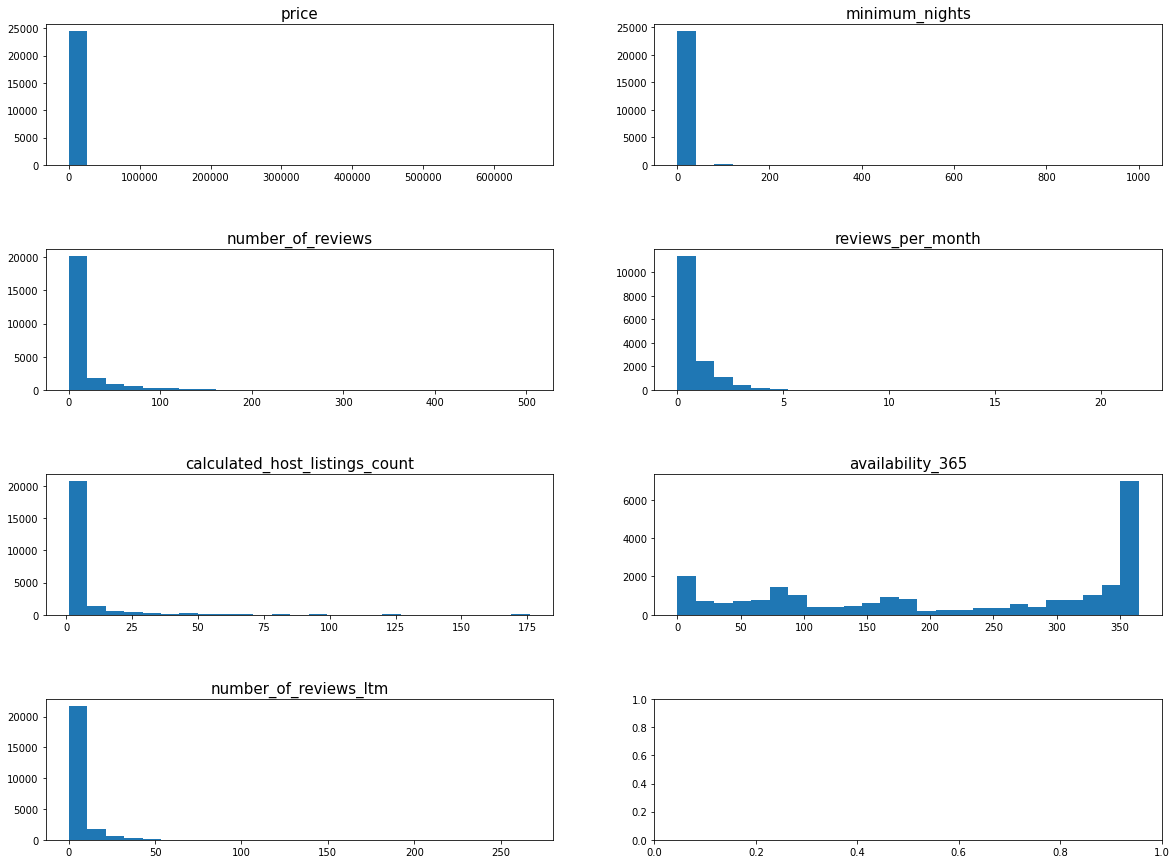

In [11]:
plot_histogramas(df, colunas_distribuicao)

#### **Q2. Há outliers presente?**

Observando o histograma acima, é possível notar que há outliers em todas as variáveis, com exceção de `availability_365`. 

O gráfico de distribuição, apesar de dar indícios de outlier, não é melhor gráfico para verificar.

Utilizaremos 2 formas para garantir que há outlier em cada variável do dataset.

In [12]:
df[colunas_distribuicao].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,24549.00,24549.00,24549.00,15588.00,24549.00,24549.00,24549.00
mean,1029.59,5.09,14.51,0.69,7.07,218.95,3.58
std,5403.74,21.21,34.05,0.94,20.05,133.73,8.35
min,0.00,1.00,0.00,0.01,1.00,0.00,0.00
25%,250.00,2.00,0.00,0.09,1.00,86.00,0.00
50%,479.00,3.00,2.00,0.31,1.00,257.00,0.00
75%,900.00,4.00,12.00,0.96,4.00,355.00,3.00
max,650476.00,1000.00,504.00,21.79,176.00,365.00,267.00


##### .describe()

Utilizando o método `.describe()` notamos alguns resultados interessantes:

1. 75% do preço do aluguel (`price`) estão abaixo de R\$ 900,00. Mas o maior valor para esta coluna é R\$ 650476,00. Um valor muito maior que grande parte da variável.
2. A quantidade mínima de noites (`minimum_nights`) é maior que um ano, enquanto que 75% dos valores estão abaixo de 4 noites.
3. Acomodações por host (`calculated_host_listings_count`), a maioria dos hosts tem apenas 1 acomodação , 25% tem 4 ou mais acomodações e apenas 1 host tem 176 acomodações. Pode acontecer, mas podemos olhar quem é este host. É uma pessoa física ou um hotel que anuncia o quarto no Airbnb?

##### Boxplot

A outra forma é analisando o gráfico de boxplot, um gráfico para representação da distribuição dos dados.

Ele apresenta informações referentes a localização, assimetria e outliers.

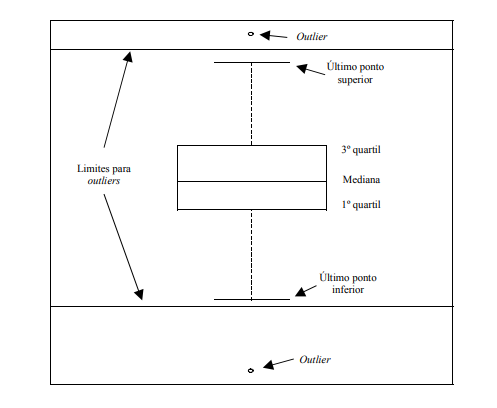

Iremos plotar o boxplot apenas das três variáveis que foram apontadas como havendo possíveis outliers anteriormente

In [57]:
def plot_boxplot(dataframe):
    
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(16, 9))

    plt.subplot(3, 1, 1)
    dataframe['price'].plot(kind='box', vert=False)
    plt.yticks([])
    plt.title('Price', fontsize=15)

    plt.subplot(3, 1, 2)
    dataframe['minimum_nights'].plot(kind='box', vert=False)
    plt.yticks([])
    plt.title('Minimum Nights', fontsize=15)

    plt.subplot(3, 1, 3)
    dataframe['calculated_host_listings_count'].plot(kind='box', vert=False)
    plt.yticks([])
    plt.title('Calculated Host Listings Count', fontsize=15)

    plt.subplots_adjust(
            hspace=0.6
        )

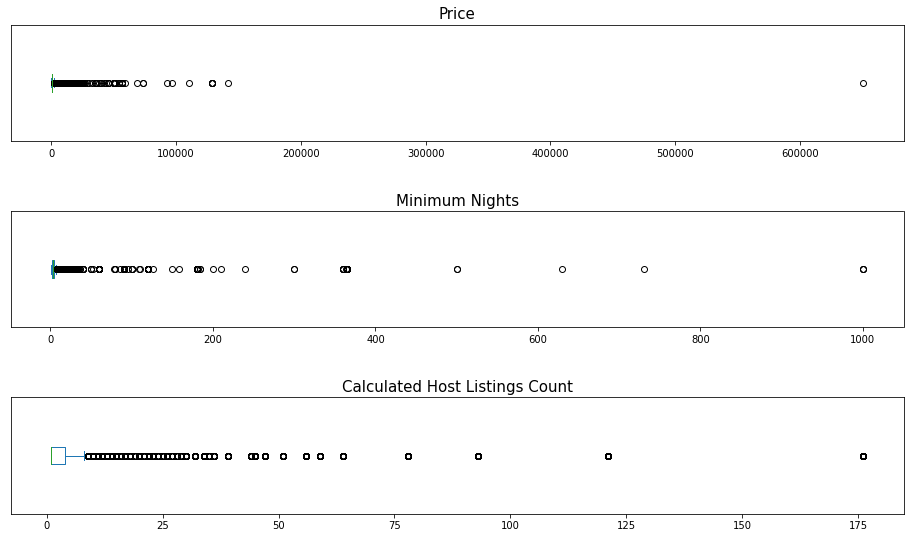

In [58]:
plot_boxplot(df)

##### Verificando a variável `calculated_host_listings_count`

In [18]:
df['host_id'].value_counts().sort_values(ascending=False)[:5]

91654021     176
371026651    121
6000862       93
1982737       78
8975746       64
Name: host_id, dtype: int64

In [35]:
# Acomodações do host_id 91654021
acomodacoes_por_host_91654021 = df[
                                   df['host_id'] == 91654021][['neighbourhood', 'room_type', 'price', 'host_name']
                                ]

acomodacoes_por_host_91654021

,neighbourhood,room_type,price,host_name
8487,Ipanema,Entire home/apt,1713,Daniel
8511,Copacabana,Entire home/apt,1822,Daniel
8512,Copacabana,Entire home/apt,1310,Daniel
8513,Copacabana,Entire home/apt,3637,Daniel
8514,Copacabana,Entire home/apt,1661,Daniel
...,...,...,...,...
23942,Copacabana,Entire home/apt,219,Daniel
23975,Copacabana,Entire home/apt,529,Daniel
24165,Recreio dos Bandeirantes,Entire home/apt,549,Daniel
24294,Copacabana,Entire home/apt,964,Daniel


In [25]:
acomodacoes_por_host_91654021['room_type'].value_counts()

Entire home/apt    172
Private room         4
Hotel room           0
Shared room          0
Name: room_type, dtype: int64

In [23]:
acomodacoes_por_host_91654021['neighbourhood'].value_counts()

Copacabana                  74
Ipanema                     54
Leblon                      15
Botafogo                     6
Leme                         5
Centro                       4
Barra da Tijuca              3
Rio Comprido                 3
Laranjeiras                  2
Flamengo                     2
Gávea                        2
Jacarepaguá                  1
Glória                       1
Vigário Geral                1
Urca                         1
Santa Teresa                 1
Recreio dos Bandeirantes     1
Name: neighbourhood, dtype: int64

In [36]:
# Acomodações do host_id 371026651
acomodacoes_por_host_371026651 = df[
                                   df['host_id'] == 371026651][['neighbourhood', 'room_type', 'price', 'host_name']
                                ]

acomodacoes_por_host_371026651

,neighbourhood,room_type,price,host_name
13646,Barra da Tijuca,Entire home/apt,1116,CaviRio
13665,Barra da Tijuca,Entire home/apt,1440,CaviRio
15858,Barra da Tijuca,Entire home/apt,1050,CaviRio
17177,Barra da Tijuca,Entire home/apt,2109,CaviRio
17206,Lagoa,Entire home/apt,1363,CaviRio
...,...,...,...,...
24306,Ipanema,Entire home/apt,930,CaviRio
24345,Copacabana,Entire home/apt,1350,CaviRio
24346,Barra da Tijuca,Entire home/apt,2520,CaviRio
24347,Copacabana,Entire home/apt,1350,CaviRio


In [30]:
acomodacoes_por_host_371026651['room_type'].value_counts()

Entire home/apt    116
Private room         5
Hotel room           0
Shared room          0
Name: room_type, dtype: int64

In [32]:
acomodacoes_por_host_371026651['neighbourhood'].value_counts()

Copacabana         63
Barra da Tijuca    24
Ipanema            21
Leblon              8
Lagoa               2
Botafogo            2
Flamengo            1
Name: neighbourhood, dtype: int64

Analisando os 2 maiores anfitriões deste dataset e fazendo uma pesquisa no próprio site do Airbnb, podemos ver que os hosts de fato possuem estas quantidade de acomodações.

O primeiro, Daniel (host_id = **91654021**) gerencia diversos apartamentos de amigos em diversos pontos do Rio de Janeiro, segundo a descrição no site.

E o segundo, CaviRio (host_id = **371026651**) é uma empresa que faz o mesmo, algo como uma "imobiliária" para acomodações no Airbnb.

##### Removendo os outliers

Feito a análise em `calculated_host_listings_count`, não precisaremos remover outliers desta variável, pois não se trata de um erro no dataset.

Uma vez identificado os outliers nas variáveis `price` e `minimum_nights`, iremos remover essas observações que se diferenciam drasticamente de todos os outros.

In [52]:
def remover_outlier(df, lista_variavel):

    df_temp = df.copy()

    for variavel in lista_variavel:
        q1 = df_temp[variavel].quantile(.25)
        q3 = df_temp[variavel].quantile(.75)

        iqr = q3 - q1

        inner_fence = 1*iqr
        outer_fence = 3*iqr

        # limites internos
        inner_fence_le = q1 - inner_fence
        inner_fence_ue = q3 + inner_fence

        # limites externos
        outer_fence_le = q1 - outer_fence
        outer_fence_ue = q3 + outer_fence

        df_temp = df_temp[(
            df_temp[variavel] > inner_fence_le) & (
                df_temp[variavel] < inner_fence_ue
        )]

    quantidade_observacoes_df_original = df.shape[0]
    quantidade_observacoes_df_temp = df_temp.shape[0]
    qnt_removidos = quantidade_observacoes_df_original - quantidade_observacoes_df_temp
    
    print(f"Foram removidos {qnt_removidos} observações do dataset")
    return df_temp

Foram removidos 5526 observações do dataset


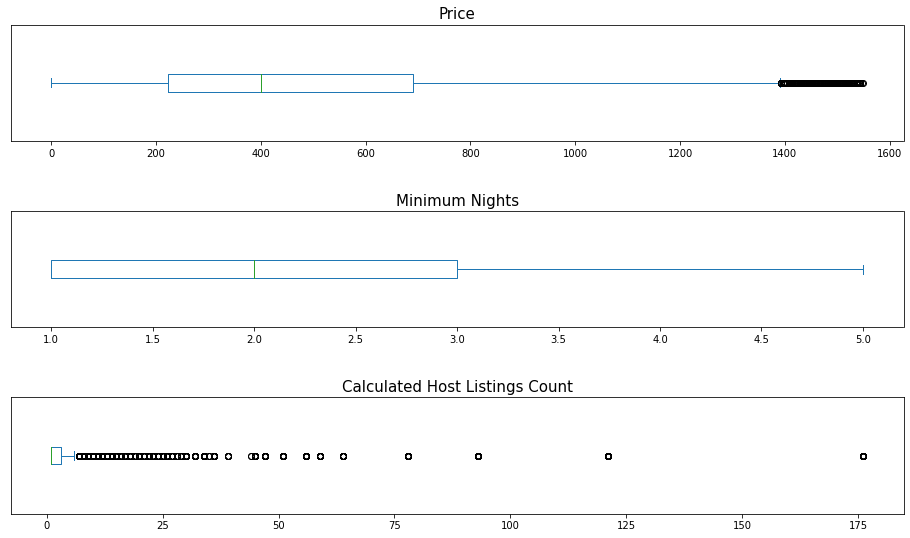

In [59]:
df_clean = remover_outlier(df, ['price', 'minimum_nights'])
plot_boxplot(df_clean)

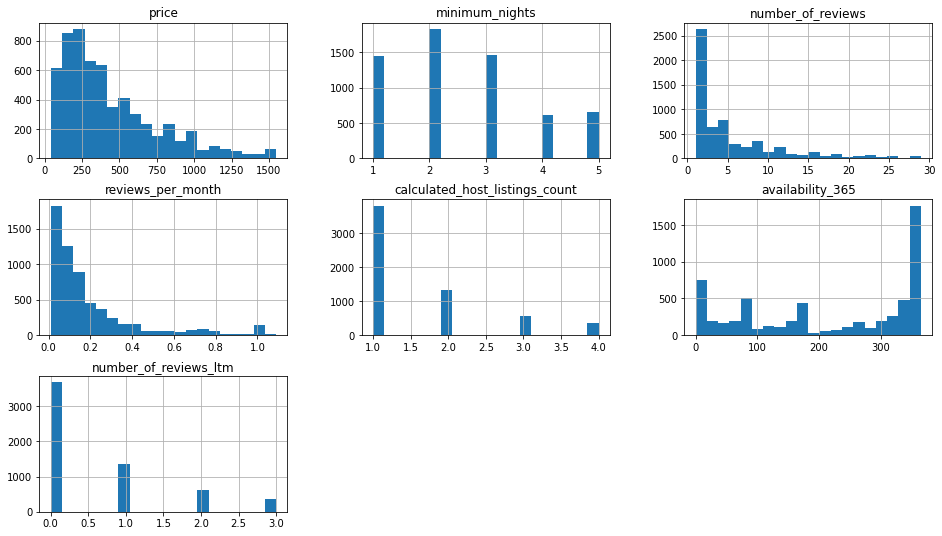

In [50]:
df_clean[colunas_distribuicao].hist(bins=20, figsize=(16,9));

#### **Q3. Qual o tipo de imóvel mais alugado no Airbnb?**

Depois de retirar os outliers, vamos dar prosseguimento à análise de dados.

Em todo, dataset há 4 tipos de acomodações:

    1. Apartamento/Casa
    2. Quarto
    3. Quarto Compartilhado
    4. Hotel

O último tipo tem um número insignificante para a análise, portanto, falarei apenas dos 3 tipos de acomodações.


In [74]:
df_clean['room_type'].value_counts(normalize=True).round(2) * 100

Entire home/apt    72.0
Private room       25.0
Shared room         2.0
Hotel room          0.0
Name: room_type, dtype: float64

In [70]:
proporcao_room_type = (df['room_type'].value_counts(normalize=True).round(2) * 100).to_list()

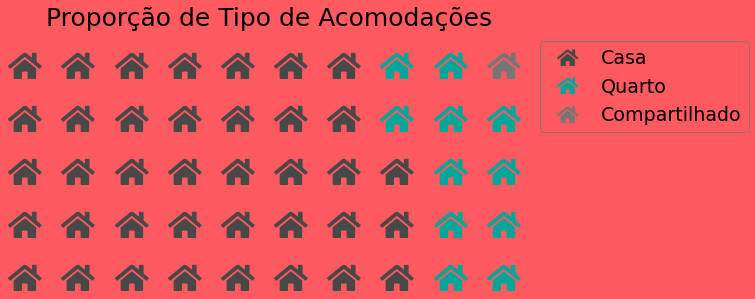

In [71]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values=proporcao_room_type,
    colors=["#484848", "#00A699", "#767676", "#555555"],
    icons='home',
    font_size=30,
    icon_style='solid',
    icon_legend=True,
    facecolor='#FF5A5F',
    title={
        'label': 'Proporção de Tipo de Acomodações',
        'fontdict': {
            'fontsize': 25
        }
    },
    legend={
        'labels': ['Casa', 'Quarto', 'Compartilhado'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1),
        'fontsize': 19,
        'facecolor': '#FF5A5F',
        'edgecolor': '#767676'
    },
    figsize=(10.6,6)
)


#### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
media_preco = round(df_clean['price'].mean(), 2)
std_preco = round(df_clean['price'].std(), 2)

print(f'{media_preco} ± {std_preco}')

435.24 ± 322.13


#### **Q6. Qual a correlação existente entre as variáveis?**

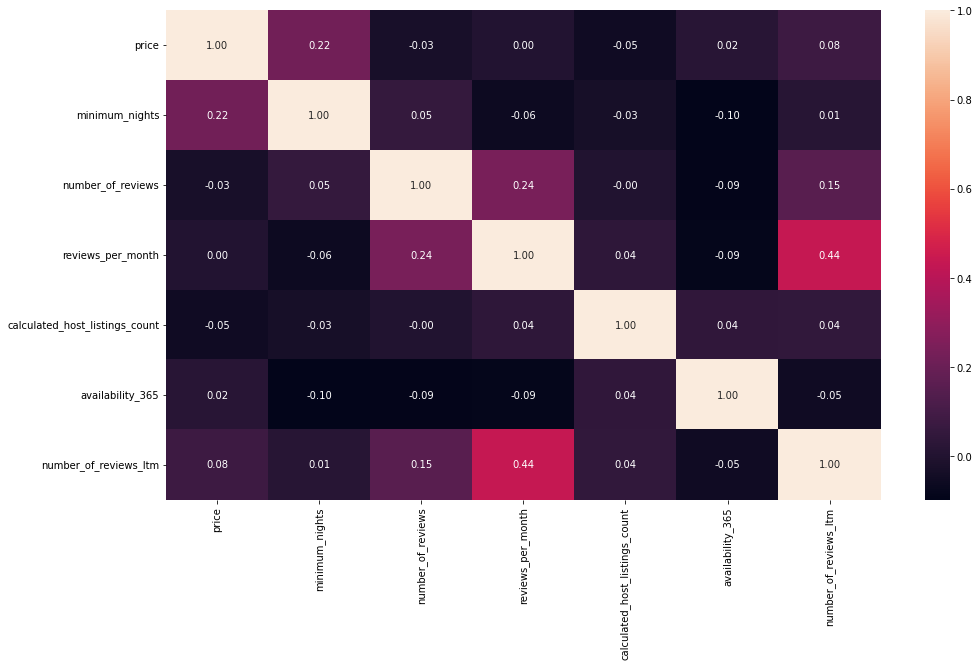

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,9))
sns.heatmap(df_clean[colunas_distribuicao].corr(), fmt='.2f', annot=True)

#### **Q8. Qual a localidade mais cara do dataset?**

In [ ]:
preco_medio_por_bairro = df_clean.groupby('neighbourhood')['price'].mean().round(2).sort_values(ascending=False)
contagem_por_bairro = df_clean['neighbourhood'].value_counts()

df_preco_contagem = pd.concat([preco_medio_por_bairro, contagem_por_bairro], axis=1).sort_values(by='price', ascending=False)

df_preco_contagem.head(10)

,price,neighbourhood
Leblon,665.94,238
Alto da Boa Vista,640.25,4
Lagoa,624.27,55
Ipanema,596.30,427
Complexo do Alemão,550.00,2
Vila Valqueire,537.67,3
Bangu,536.50,2
Barra da Tijuca,525.58,581
Vargem Grande,512.26,19
Campo Grande,491.29,14


In [ ]:
df_clean['price'].max()

1549

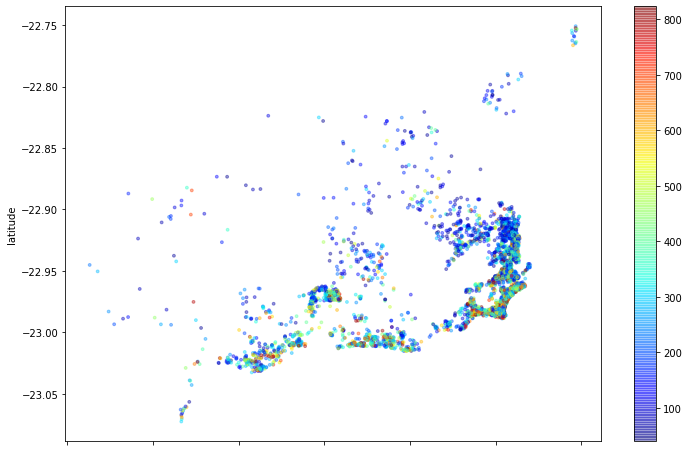

In [ ]:
#@title Plotando imóveis por preço
#@markdown Ajuste os parametros

preco_max = 824  #@param {type: "slider", min: 0, max: 1549}

#@markdown ---

df_graph = df_clean[df_clean['price'] < preco_max]

df_graph.plot(kind="scatter", x='longitude', y='latitude',
              alpha=0.4, c=df_graph['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


#### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
media_minimo_noites = round(df_clean['minimum_nights'].mean(), 2)
std_minimo_noites = round(df_clean['minimum_nights'].std(), 2)

print(f'{media_minimo_noites} ± {std_minimo_noites}')

2.53 ± 1.26
